In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

In [ ]:
#Install
'''
C:\Users\kon3254>conda install -c conda-forge keras
Downloading and Extracting Packages
absl-py-0.6.1        | 151 KB    | #################################### | 100%
boost-cpp-1.68.0     | 31.1 MB   | #################################### | 100%
gast-0.2.1.post0     | 9 KB      | #################################### | 100%
libgpuarray-0.7.6    | 314 KB    | #################################### | 100%
theano-1.0.3         | 3.7 MB    | #################################### | 100%
tensorboard-1.9.0    | 3.3 MB    | #################################### | 100%
glog-0.3.5           | 130 KB    | #################################### | 100%
conda-4.5.12         | 658 KB    | #################################### | 100%
vs2015_win-64-14.0.2 | 5 KB      | #################################### | 100%
astor-0.7.1          | 22 KB     | #################################### | 100%
parquet-cpp-1.5.1    | 3 KB      | #################################### | 100%
keras-applications-1 | 26 KB     | #################################### | 100%
keras-preprocessing- | 26 KB     | #################################### | 100%
tensorflow-1.9.0     | 31.7 MB   | #################################### | 100%
mako-1.0.7           | 57 KB     | #################################### | 100%
protobuf-3.5.2       | 511 KB    | #################################### | 100%
scipy-1.1.0          | 13.5 MB   | #################################### | 100%
grpcio-1.16.0        | 861 KB    | #################################### | 100%
mkl-2018.0.3         | 178.1 MB  | #################################### | 100%
markdown-2.6.11      | 56 KB     | #################################### | 100%
gflags-2.2.2         | 1.4 MB    | #################################### | 100%
termcolor-1.1.0      | 6 KB      | #################################### | 100%
pyarrow-0.11.1       | 1.5 MB    | #################################### | 100%
keras-2.2.4          | 458 KB    | #################################### | 100%
arrow-cpp-0.11.1     | 64.6 MB   | #################################### | 100%
pygpu-0.7.6          | 583 KB    | #################################### | 100%
openssl-1.0.2p       | 5.4 MB    | #################################### | 100%
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
''' 

In [19]:
import keras 

In [3]:
!conda list | grep keras

keras                     2.2.4                         0  
keras-applications        1.0.6                    py36_0  
keras-base                2.2.4                    py36_0  
keras-preprocessing       1.0.5                    py36_0  


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD #Adadelta, Adagrad, Adam, Adamax, K, Nadam, RMSprop, SGD, TFOptimizer

In [22]:
df = pd.read_csv('../../data/raw/Udemy_Zero_to_deep_learning_Mosconi/weight-height.csv')

In [6]:
'''
NOTE: with dataset(weight-height.csv), you can do
1) Regression (with weight as input and height as output)
2) Classification:
    a) with weight & height as input and gender as output (TO DO LATER)
    b) with weight as input and gender as output(DONE BELOW)
'''

'\nNOTE: with dataset(weight-height.csv), you can do\n1) Regression (with weight as input and height as output)\n2) Classification:\n    a) with weight & height as input and gender as output (TO DO LATER)\n    b) with weight as input and gender as output(DONE BELOW)\n'

In [23]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


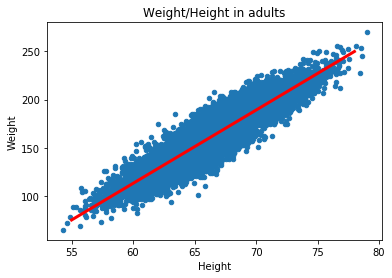

In [26]:
df.plot(kind='scatter', x='Height', y='Weight',  title='Weight/Height in adults')
plt.plot([55,78], [75,250], color='red', linewidth=3)

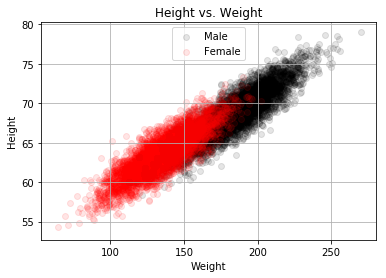

In [7]:
plt.scatter('Weight', 'Height', data=df.query('Gender == "Male"'), color='black', label='Male', alpha=0.1)
plt.scatter('Weight', 'Height', data=df.query('Gender == "Female"'), color='red', label='Female', alpha=0.1)
plt.title("Height vs. Weight")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend(loc='upper center')  # add a legend for clarity
plt.grid(True)
plt.show()

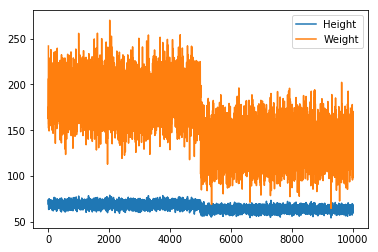

In [10]:
df.plot()

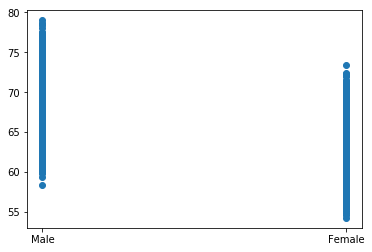

In [11]:
plt.scatter(df.Gender, df.Height)

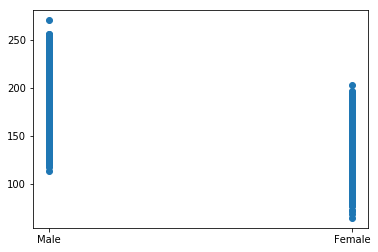

In [12]:
plt.scatter(df.Gender, df.Weight)

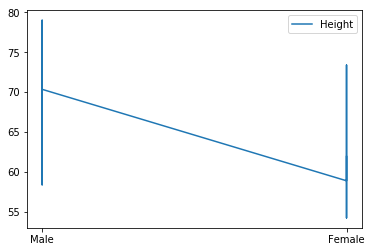

In [13]:
fig, ax = plt.subplots()
ax.plot(kind='scatter', x=df.Gender, y=df.Weight, label="Weight")
ax.plot(df.Gender, df.Height, label="Height")
ax.legend()

plt.show()

In [8]:
X = df.Height

In [9]:
X[:5]

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [10]:
y = df.Gender

In [11]:
y[:5]

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [12]:
from keras.utils import to_categorical

In [13]:
y.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [14]:
#y_encoded = to_categorical(df.Gender, num_classes=2)
#ValueError: invalid literal for int() with base 10: 'Male'

In [15]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder() 
y_encoded = labelEncoder.fit_transform(y)
y_encoded

array([1, 1, 1, ..., 0, 0, 0])

In [16]:
y_encoded2 = to_categorical(y_encoded, num_classes=2, dtype='float32')

In [17]:
y_encoded2

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [24]:
X.shape

(10000,)

In [25]:
y_encoded2.shape

(10000, 2)

In [26]:
model = Sequential()

In [27]:
model.add(Dense(units=2, input_shape=(1,)))

In [28]:
model.summary()  # 1 layer with 1 output and 2 parameters(bias & weight)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [29]:
# compiling is done with tensorflow since the default backend is tensorflow
model.compile(optimizer=(Adam(lr=0.8)), loss='mean_squared_error')

In [30]:
model.fit(X, y_encoded2, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 2s 228us/step - loss: 56.5241
Epoch 2/10
10000/10000 [==============================] - 1s 103us/step - loss: 0.2885
Epoch 3/10
10000/10000 [==============================] - 1s 135us/step - loss: 0.2984
Epoch 4/10
10000/10000 [==============================] - 1s 131us/step - loss: 0.3456
Epoch 5/10
10000/10000 [==============================] - 1s 107us/step - loss: 0.4558
Epoch 6/10
10000/10000 [==============================] - 1s 99us/step - loss: 1.3882
Epoch 7/10
10000/10000 [==============================] - 1s 133us/step - loss: 1.3201
Epoch 8/10
10000/10000 [==============================] - 1s 105us/step - loss: 1.3297
Epoch 9/10
10000/10000 [==============================] - 1s 98us/step - loss: 1.7876
Epoch 10/10
10000/10000 [==============================] - 1s 103us/step - loss: 2.3077


In [31]:
y_pred = model.predict_classes(X)

In [32]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [33]:
y_encoded.dtype

dtype('int64')

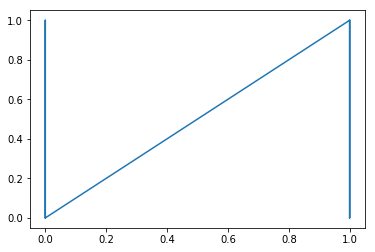

In [34]:
plt.plot(y_encoded,y_pred)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
confusion_matrix(y_encoded, y_pred)

array([[2887, 2113],
       [ 242, 4758]])

In [37]:
accuracy_score(y_encoded, y_pred)

0.7645

In [1]:
# END